In [5]:
#importing matplotlib library and networkx library
import networkx as nx
import matplotlib.pyplot as plt

In [4]:
#creating an empty graph object
MyGraph = nx.Graph()

#add two nodes A and B
MyGraph.add_node('A')
MyGraph.add_node('B')

#also add edge to join them together with undirected graph
MyGraph.add_edge('A', 'B')

In [6]:
#adding graph attributes
MyGraph.add_node('A', A1=1)
nx.set_node_attributes(MyGraph, values={'A': 100, 'B':35, 'C': 2, 'D': 4}, name='A1')

#adding attributes stored in dictionery
NodeDictionary = nx.get_node_attributes(MyGraph, 'A1')

#also adding list
NodeList = list(NodeDictionary.values())
print(NodeDictionary)
print(NodeList)

{'A': 100}
[100]


In [7]:
#adding node position and color codes represent 3 lines with 4 stations

# Green Line
MyGraph.add_node('A', npos=(10, 10), ccn='#00FF00')
MyGraph.add_node('B', npos=(50, 50), ccn='#00FF00')
MyGraph.add_node('C', npos=(50, 90), ccn='#00FF00')
MyGraph.add_node('D', npos=(75, 90), ccn='#00FF00')

# Orange Line
MyGraph.add_node('E', npos=(55, 50), ccn='#FF4500')
MyGraph.add_node('F', npos=(90, 90), ccn='#FF4500')
MyGraph.add_node('G', npos=(175, 90), ccn='#FF4500')
MyGraph.add_node('H', npos=(175, 70), ccn='#FF4500')

# Blue Line
MyGraph.add_node('I', npos=(150, 25), ccn='#0000FF')
MyGraph.add_node('J', npos=(130, 55), ccn='#0000FF')
MyGraph.add_node('K', npos=(100, 65), ccn='#0000FF')
MyGraph.add_node('L', npos=(52, 45), ccn='#0000FF')

In [8]:
#adding edge with its color codes

# Green Line
MyGraph.add_edge('A', 'B', cce='#00FF00')
MyGraph.add_edge('B', 'C', cce='#00FF00')
MyGraph.add_edge('C', 'D', cce='#00FF00')

# Orange Line
MyGraph.add_edge('E', 'F', cce='#FF4500')
MyGraph.add_edge('F', 'G', cce='#FF4500')
MyGraph.add_edge('G', 'H', cce='#FF4500')

# Blue Line
MyGraph.add_edge('I', 'J', cce='#0000FF')
MyGraph.add_edge('J', 'K', cce='#0000FF')
MyGraph.add_edge('K', 'L', cce='#0000FF')


In [9]:
# Extract attributes from the graph to dictionaries
pos = nx.get_node_attributes(MyGraph, 'npos')
nodecolour = nx.get_node_attributes(MyGraph, 'ccn')
edgecolour = nx.get_edge_attributes(MyGraph, 'cce')

# Place the dictionary values in lists
NodeList = list(nodecolour.values())
EdgeList = list(edgecolour.values())

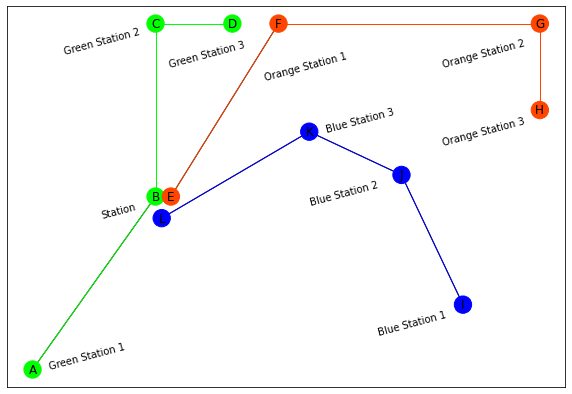

In [10]:
# Set the size of the figure
plt.figure(figsize=(10, 7))

# Display the names of the stations
plt.text(15, 10, s='Green Station 1', rotation=15)
plt.text(32, 45, s='Station', rotation=15)
plt.text(20, 83, s='Green Station 2', rotation=15)
plt.text(54, 80, s='Green Station 3', rotation=15)

plt.text(85, 77, s='Orange Station 1', rotation=15)
plt.text(143, 80, s='Orange Station 2', rotation=15)
plt.text(143, 62, s='Orange Station 3', rotation=15)

plt.text(122, 18, s='Blue Station 1', rotation=15)
plt.text(100, 48, s='Blue Station 2', rotation=15)
plt.text(105, 65, s='Blue Station 3', rotation=15)

# Draw the nodes and the edges
nx.draw_networkx(MyGraph, pos, node_color=NodeList)
nx.draw_networkx_edges(MyGraph, pos, edge_color=EdgeList)

# Visualise the graph
plt.show()

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# This subroutine encapsulates the 'plot' method, as the most suitable for raster rendering
def DrawBox(x, y, size, r, g, b):
    if r < 0:
        r = int(0)
    if g < 0:
        g = int(0)
    if b < 0:
        b = int(0)
    if r > 255:
        r = int(255)
    if g > 255:
        g = int(255)
    if b > 255:
        b = int(255)
    for i in range(0, int(size)):
        plt.plot([x, x + size], [y + i, y + i], '#{:02x}{:02x}{:02x}'.format(r, g, b))


In [31]:
# Store the dataset into a data frame
df = pd.read_csv('HeatMap.csv')
# Print the content on the screen
print(df.head(7))

          City   1   2   3   4   5   6   7   8   9  10  11  12
0      Phoenix   6   8  11  16  21  25  27  26  23  17  10   6
1  Little Rock   4   6  12  17  21  25  28  27  23  17  11   6
2   Sacramento   9  11  13  15  18  21  23  23  21  17  13   9
3       Denver  -2   1   5   9  14  20  23  21  17  10   3  -2
4     Hartford  -2   1   4  10  15  21  24  23  19  12   7   1
5        Dover   1   2   6  12  17  22  25  24  20  14   8   3
6  Tallahassee  15  17  19  22  25  27  27  27  26  23  20  17


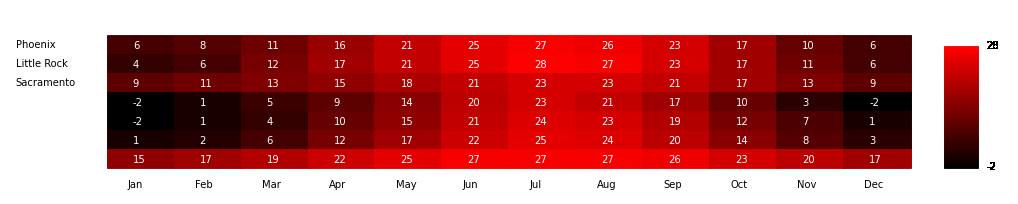

In [33]:
# Set the plot
plt.figure(figsize=(18, 3.5))
plt.axis([0, 600, 0, 400])
plt.xticks([])
plt.yticks([])
plt.axis('off')

Min = int(min(df.min(numeric_only=True)))
Max = int(max(df.max(numeric_only=True)))
BoxSize = int(40)
OffsetX = int(15)
OffsetY = int(12)


# Generate the heat map
for i in range(0, df.shape[0]):
    for j in range(1, df.shape[1]):
        ColourCode = int(((df.values[i, j]-Min)/(Max-Min))*255)
        DrawBox(20+BoxSize*j, 300-BoxSize*i, BoxSize, ColourCode, 0, 0)
        plt.text(OffsetX+20+BoxSize*j, OffsetY+300-BoxSize*i, str(df.values[i, j]), color='white')

for i in range(0, 256):
    plt.plot([560, 580], [i + 60, i + 60], '#{:02x}{:02x}{:02x}'.format(int(i), 0, 0))
    plt.text(585, 58, Min)
    plt.text(585, 312, Max)
    
plt.text(72, 20, 'Jan')
plt.text(112, 20, 'Feb')
plt.text(152, 20, 'Mar')
plt.text(192, 20, 'Apr')
plt.text(232, 20, 'May')
plt.text(272, 20, 'Jun')
plt.text(312, 20, 'Jul')
plt.text(352, 20, 'Aug')
plt.text(392, 20, 'Sep')
plt.text(432, 20, 'Oct')
plt.text(472, 20, 'Nov')
plt.text(512, 20, 'Dec')

plt.text(5, 315, str(df.values[0, 0]))
plt.text(5, 275, str(df.values[1, 0]))
plt.text(5, 235, str(df.values[2, 0]))
#plt.text(5, 195, str(df.values[3, 0]))
#plt.text(5, 155, str(df.values[4, 0]))
#plt.text(5, 115, str(df.values[5, 0]))
#plt.text(5, 75, str(df.values[6, 0]))
plt.show()